In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt


In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
okc_data = pd.read_csv("..\okcupid_dataset_data\profiles.csv")

In [15]:
## Data Exploration: What are the variables?
# ['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
#        'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
#        'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
#        'last_online', 'location', 'offspring', 'orientation', 'pets',
#        'religion', 'sex', 'sign', 'smokes', 'speaks', 'status']

# age: integer
# body_type: ordinal (+'rather not say')
# diet: categorial (veg/halal/kosher) *and* ordinal (veg/most veg/strict veg)
# drugs: ordinal (never/sometimes/always)
# drinks: ordinal
# education: categorial+ordinal v messy (could simplify to going to uni/uni/masters/other)
# {'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7','essay8', 'essay9',}
    # free text with html
# ethnicity: multiple-choice categories (heavily skewed white/asians/)
# height: int, discrete
# income: int, discrete (-1 probably means "rather not say" - 48,000/60,000 chose that)
# job: categorical ("industry")
# last_online: datetime (date:hour:minute)
# location: hierarchial categorical (city, state) - vastly skewed to California
# offspring: ordinal x 2, desire for kids, currently have kids - problem with HTML entities
# orientation: categorical - with overlap (bisexual)
# pets: categorical, ordinal (cats / dogs, dislikes/likes/has)
# religion: categorical, ordinal (atheist/hindu, serious/laughing about/not serious)
# sex: categorical (only two possibilities m/f)
# sign: categorical, ordinal - (pisces, care about/don't) - query: why no blanks?
# smokes: ordinal
# speaks: categorical, ordinal, multiple choice (e.g. English (fluently), Spanish (okay))
# status: categorical - "unknown" with 10 entries. "single" and "available" seem the same, as does "married" and "seeing someone"




In [16]:
okc_data


,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single
5,29,average,mostly anything,socially,NaN,graduated from college/university,"i'm an australian living in san francisco, but...",building awesome stuff. figuring out what's im...,imagining random shit. laughing at aforementio...,i have a big smile. i also get asked if i'm we...,...,"san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes cats,atheism,m,taurus,no,"english (fluently), chinese (okay)",single
6,32,fit,strictly anything,socially,never,graduated from college/university,life is about the little things. i love to lau...,digging up buried treasure,frolicking<br />\nwitty banter<br />\nusing my...,i am the last unicorn,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,f,virgo,NaN,english,single
7,31,average,mostly anything,socially,never,graduated from college/university,NaN,"writing. meeting new people, spending time wit...","remembering people's birthdays, sending cards,...",i'm rather approachable (a byproduct of being ...,...,"san francisco, california","doesn&rsquo;t have kids, but wants them",straight,likes dogs and likes cats,christianity,f,sagittarius,no,"english, spanish (okay)",single
8,24,NaN,strictly anything,socially,NaN,graduated from college/university,NaN,"oh goodness. at the moment i have 4 jobs, so i...",NaN,i'm freakishly blonde and have the same name a...,...,"belvedere tiburon, california",doesn&rsquo;t have kids,straight,likes dogs and likes cats,christianity but not too serious about it,f,gemini but it doesn&rsquo;t matter,when drinking,english,single
9,37,athletic,mostly anything,not at all,never,working on two-year college,my names jake.<br />\ni'm a creative guy and i...,i have an apartment. i like to explore and che...,i'm good at finding creative solutions to prob...,i'm short,...,"san mateo, california",NaN,straight,likes d

In [30]:
okc_data.dtypes

age              int64
body_type       object
diet            object
drinks          object
drugs           object
education       object
essay0          object
essay1          object
essay2          object
essay3          object
essay4          object
essay5          object
essay6          object
essay7          object
essay8          object
essay9          object
ethnicity       object
height         float64
income           int64
job             object
last_online     object
location        object
offspring       object
orientation     object
pets            object
religion        object
sex             object
sign            object
smokes          object
speaks          object
status          object
dtype: object

In [6]:
okc_data.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

In [37]:
okc_data[ "last_online" ].value_counts()


#.value_counts()

2012-06-29-22-56    24
2012-06-30-23-27    23
2012-06-30-22-56    23
2012-06-30-21-51    23
2012-06-30-22-09    23
2012-06-30-10-15    22
2012-06-30-22-53    22
2012-06-30-22-13    22
2012-06-30-11-14    22
2012-06-30-22-50    22
2012-06-30-23-55    22
2012-06-30-22-57    22
2012-06-30-19-23    21
2012-06-30-19-09    21
2012-06-30-21-59    21
2012-06-30-11-55    21
2012-06-29-22-42    21
2012-06-30-21-12    21
2012-06-29-22-33    20
2012-06-29-23-39    20
2012-06-30-19-44    20
2012-06-30-19-47    20
2012-06-29-22-50    20
2012-06-30-19-24    20
2012-06-30-20-04    20
2012-06-29-22-58    20
2012-06-29-23-23    20
2012-06-29-22-21    20
2012-06-30-22-49    20
2012-06-30-11-32    20
                    ..
2012-02-17-17-51     1
2012-03-10-13-13     1
2011-06-27-19-04     1
2012-06-20-00-19     1
2012-04-09-19-10     1
2012-05-26-10-07     1
2012-04-29-20-44     1
2012-03-14-00-01     1
2012-05-07-00-15     1
2012-06-12-18-07     1
2012-04-02-20-44     1
2012-03-30-19-19     1
2012-04-19-

In [38]:
okc_data.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


In [53]:
okc_data_cat = okc_data.copy()
okc_data_numeric = okc_data.copy()
for col in okc_data_cat:
    if okc_data_cat[col].dtype == "object":
        okc_data_cat[col] = okc_data[col].astype('category')
        okc_data_numeric[col] = okc_data_cat[col].cat.codes

In [54]:
okc_data_clone

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single
5,29,average,mostly anything,socially,NaN,graduated from college/university,"i'm an australian living in san francisco, but...",building awesome stuff. figuring out what's im...,imagining random shit. laughing at aforementio...,i have a big smile. i also get asked if i'm we...,...,"san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes cats,atheism,m,taurus,no,"english (fluently), chinese (okay)",single
6,32,fit,strictly anything,socially,never,graduated from college/university,life is about the little things. i love to lau...,digging up buried treasure,frolicking<br />\nwitty banter<br />\nusing my...,i am the last unicorn,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,f,virgo,NaN,english,single
7,31,average,mostly anything,socially,never,graduated from college/university,NaN,"writing. meeting new people, spending time wit...","remembering people's birthdays, sending cards,...",i'm rather approachable (a byproduct of being ...,...,"san francisco, california","doesn&rsquo;t have kids, but wants them",straight,likes dogs and likes cats,christianity,f,sagittarius,no,"english, spanish (okay)",single
8,24,NaN,strictly anything,socially,NaN,graduated from college/university,NaN,"oh goodness. at the moment i have 4 jobs, so i...",NaN,i'm freakishly blonde and have the same name a...,...,"belvedere tiburon, california",doesn&rsquo;t have kids,straight,likes dogs and likes cats,christianity but not too serious about it,f,gemini but it doesn&rsquo;t matter,when drinking,english,single
9,37,athletic,mostly anything,not at all,never,working on two-year college,my names jake.<br />\ni'm a creative guy and i...,i have an apartment. i like to explore and che...,i'm good at finding creative solutions to prob...,i'm short,...,"san mateo, california",NaN,straight,likes d

In [89]:
##### ALWAYS CHECK FOR NANS!

okc_data_numeric.isnull().sum()
okc_data_numeric["height"].fillna(np.mean( okc_data_numeric["height"] ), inplace=True)
okc_data_numeric.isnull().sum()

age            0
body_type      0
diet           0
drinks         0
drugs          0
education      0
ethnicity      0
height         0
income         0
job            0
last_online    0
location       0
offspring      0
orientation    0
pets           0
religion       0
sex            0
sign           0
smokes         0
speaks         0
status         0
dtype: int64

In [61]:
okc_data_numeric.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

In [72]:
essay_variables = [s for s in okc_data_numeric.columns if "essay" in s]
okc_data_numeric.drop( essay_variables, axis=1, inplace=True)

In [70]:
whos


Variable           Type         Data/Info
-----------------------------------------
bt                 Series       0        a little extra\n<...>y, skinny, thin, used up]
col                str          status
essay_variables    list         n=10
np                 module       <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
okc_data           DataFrame           age       body_typ<...>[59946 rows x 31 columns]
okc_data_cat       DataFrame           age       body_typ<...>[59946 rows x 31 columns]
okc_data_clone     DataFrame           age       body_typ<...>[59946 rows x 31 columns]
okc_data_numeric   DataFrame           age  body_type  di<...>[59946 rows x 31 columns]
pd                 module       <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
plt                module       <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>


In [73]:
okc_data_numeric

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,0,10,4,0,24,98,75.0,-1,19,...,175,2,2,14,3,1,16,1,1,3
1,35,2,6,2,2,30,215,70.0,80000,8,...,118,2,2,14,4,1,8,0,4596,3
2,38,10,0,4,-1,12,-1,68.0,-1,-1,...,155,-1,2,5,-1,1,31,0,6334,0
3,23,10,17,4,-1,24,215,71.0,20000,18,...,16,4,2,10,-1,1,28,0,6481,3
4,29,1,-1,4,0,9,22,66.0,-1,0,...,155,-1,2,14,-1,1,0,0,1,3
5,29,2,3,4,-1,9,215,67.0,-1,3,...,155,2,2,10,5,1,40,0,595,3
6,32,4,10,4,0,9,216,65.0,-1,-1,...,155,-1,2,14,-1,0,44,-1,1,3
7,31,2,3,4,0,9,215,65.0,-1,0,...,155,3,2,14,20,0,32,0,7223,3
8,24,-1,10,4,-1,9,215,67.0,-1,-1,...,14,0,2,14,24,0,19,3,1,3
9,37,1,3,1,0,31,215,65.0,-1,18,...,161,-1,2,14,6,1,11,0,2,3


In [92]:
okc_data_numeric_std = StandardScaler().fit_transform(okc_data_numeric)
okc_data_numeric_std = pd.DataFrame(okc_data_numeric_std,
                                     columns = okc_data_numeric.columns,
                                     index   = okc_data_numeric.index)

In [93]:
okc_data_numeric_std

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,-1.093898,-1.006202,1.702091,0.522080,-0.034402,1.555569,-0.661973,1.678416,-0.205806,1.622045,...,0.982972,0.476666,0.375658,1.091387,-0.593029,0.820435,-0.213998,0.618686,-0.833315,0.245286
1,0.281370,-0.327383,0.789558,-0.974362,2.264672,2.306299,0.709641,0.426749,0.616021,-0.018586,...,-0.186246,0.476666,0.375658,1.091387,-0.528221,0.820435,-0.720619,-0.293301,0.978555,0.245286
2,0.598740,2.387891,-0.579242,0.522080,-1.183939,0.054108,-1.822569,-0.073919,-0.205806,-1.360920,...,0.572720,-0.574733,0.375658,-0.340802,-0.852258,0.820435,0.735915,-0.293301,1.663871,-5.089302
3,-0.988108,2.387891,3.299024,0.522080,-1.183939,1.555569,0.709641,0.677082,-0.000341,1.472896,...,-2.278531,1.177599,0.375658,0.454859,-0.852258,0.820435,0.545933,-0.293301,1.721836,0.245286
4,-0.353369,-0.666793,-0.807376,0.522080,-0.034402,-0.321258,-1.552935,-0.574586,-0.205806,-1.211771,...,0.572720,-0.574733,0.375658,1.091387,-0.852258,0.820435,-1.227239,-0.293301,-0.833315,0.245286
5,-0.353369,-0.327383,0.105158,0.522080,-1.183939,-0.321258,0.709641,-0.324252,-0.205806,-0.764327,...,0.572720,0.476666,0.375658,0.454859,-0.463414,0.820435,1.305863,-0.293301,-0.599093,0.245286
6,-0.035999,0.351435,1.702091,0.522080,-0.034402,-0.321258,0.721364,-0.824919,-0.205806,-1.360920,...,0.572720,-0.574733,0.375658,1.091387,-0.852258,-1.218865,1.559174,-1.205287,-0.833315,0.245286
7,-0.141789,-0.327383,0.105158,0.522080,-0.034402,-0.321258,0.709641,-0.824919,-0.205806,-1.211771,...,0.572720,0.827133,0.375658,1.091387,0.508697,-1.218865,0.799243,-0.293301,2.014416,0.245286
8,-0.882318,-1.345611,1.702091,0.522080,-1.183939,-0.321258,0.709641,-0.324252,-0.205806,-1.360920,...,-2.319556,-0.224267,0.375658,1.091387,0.767926,-1.218865,-0.024015,2.442660,-0.833315,0.245286
9,0.492950,-0.666793,0.105158,-1.722583,-0.034402,2.431421,0.709641,-0.824919,-0.205806,1.472896,...,0.695796,-0.574733,0.375658,1.091387,-0.398607,0.820435,-0.530636,-0.293301,-0.832921,0.245286


In [98]:
pca = PCA(n_components=10)
X_r = pca.fit(okc_data_numeric_std).transform(okc_data_numeric_std)

In [99]:
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio (first two components): [ 0.08656546  0.08094349  0.07367733  0.06289842  0.05477169  0.0530519
  0.05000524  0.04810829  0.04662316  0.04480884]


Index(['sex', 'height', 'religion', 'pets'], dtype='object')
           0
16 -0.418696
7  -0.380505
15  0.296580
14  0.337024


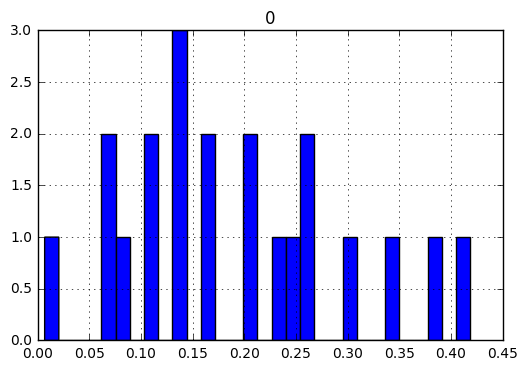

In [116]:
# First Axis
comp_0 = pd.DataFrame(pca.components_[0])
comp_0.abs().hist(bins=30)
comp_0_vars = comp_0[comp_0[0].abs()>.28].sort_values(by=0).index
print ( okc_data_numeric_std.columns[comp_0_vars] )
print ( comp_0[comp_0[0].abs()>.28].sort_values(by=0) )


Index(['height', 'sex'], dtype='object')
           0
7  -0.524565
16 -0.498823


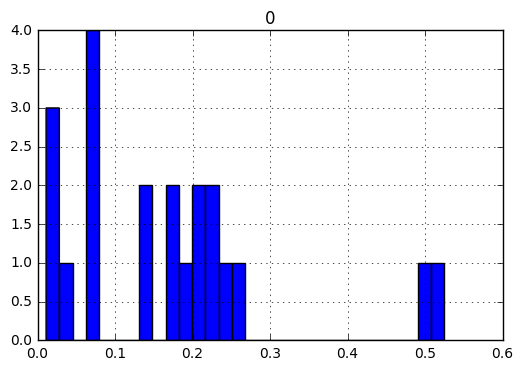

In [117]:
# Second Axis
comp_0 = pd.DataFrame(pca.components_[1])
comp_0.abs().hist(bins=30)
comp_0_vars = comp_0[comp_0[0].abs()>.3].sort_values(by=0).index
print ( okc_data_numeric_std.columns[comp_0_vars] )
print ( comp_0[comp_0[0].abs()>.28].sort_values(by=0) )

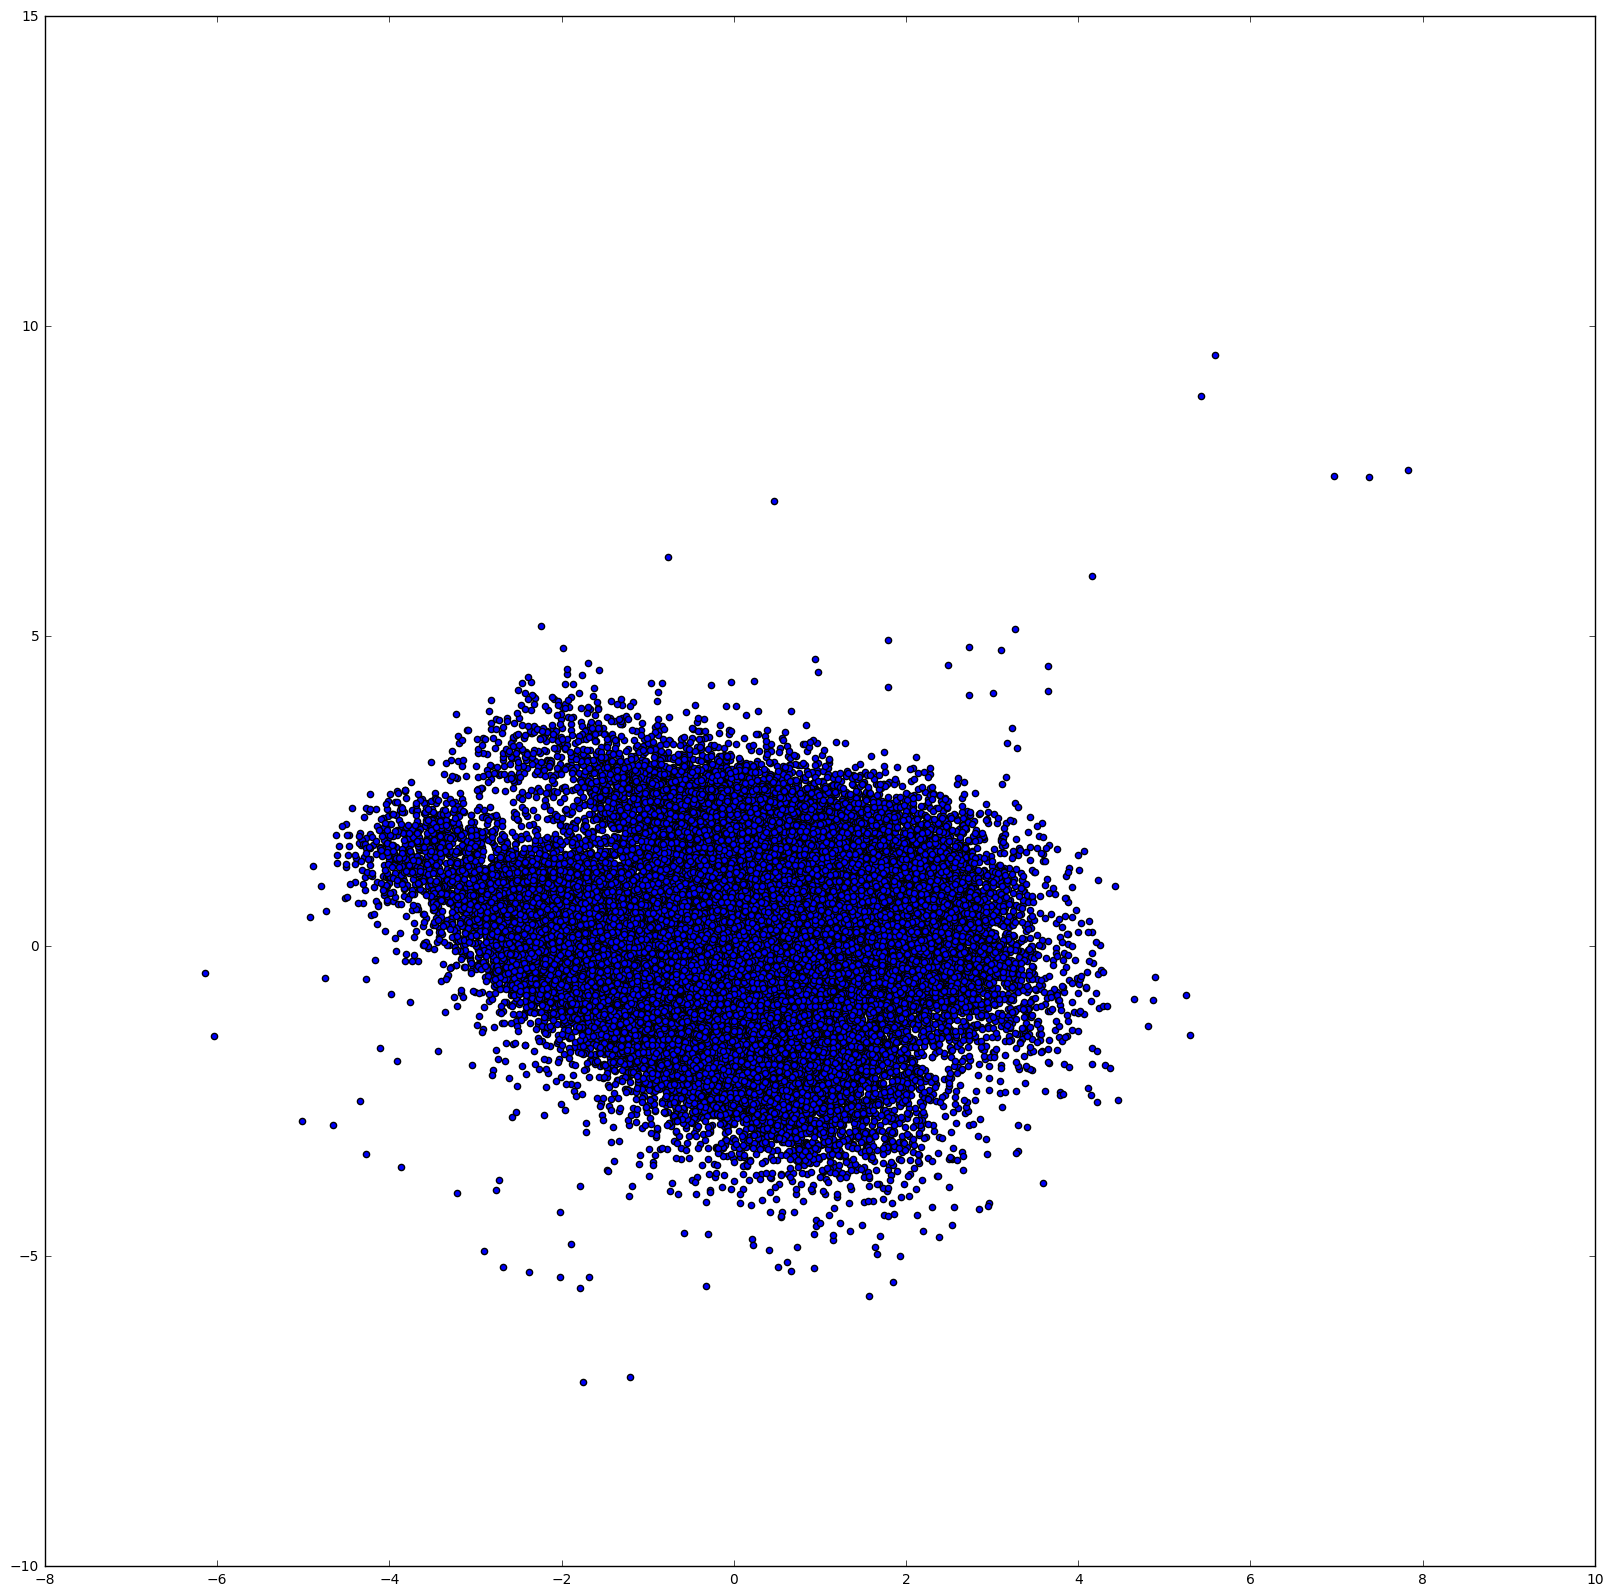

In [109]:
plt.figure(figsize=(20,20))
plt.scatter(X_r[:,0] , X_r[:,1] )

explained variance ratio (first two components): [ 0.08656549  0.08094347  0.07367782  0.06289841  0.05477282  0.05305298
  0.0500073   0.04810821  0.04662482  0.04480992]


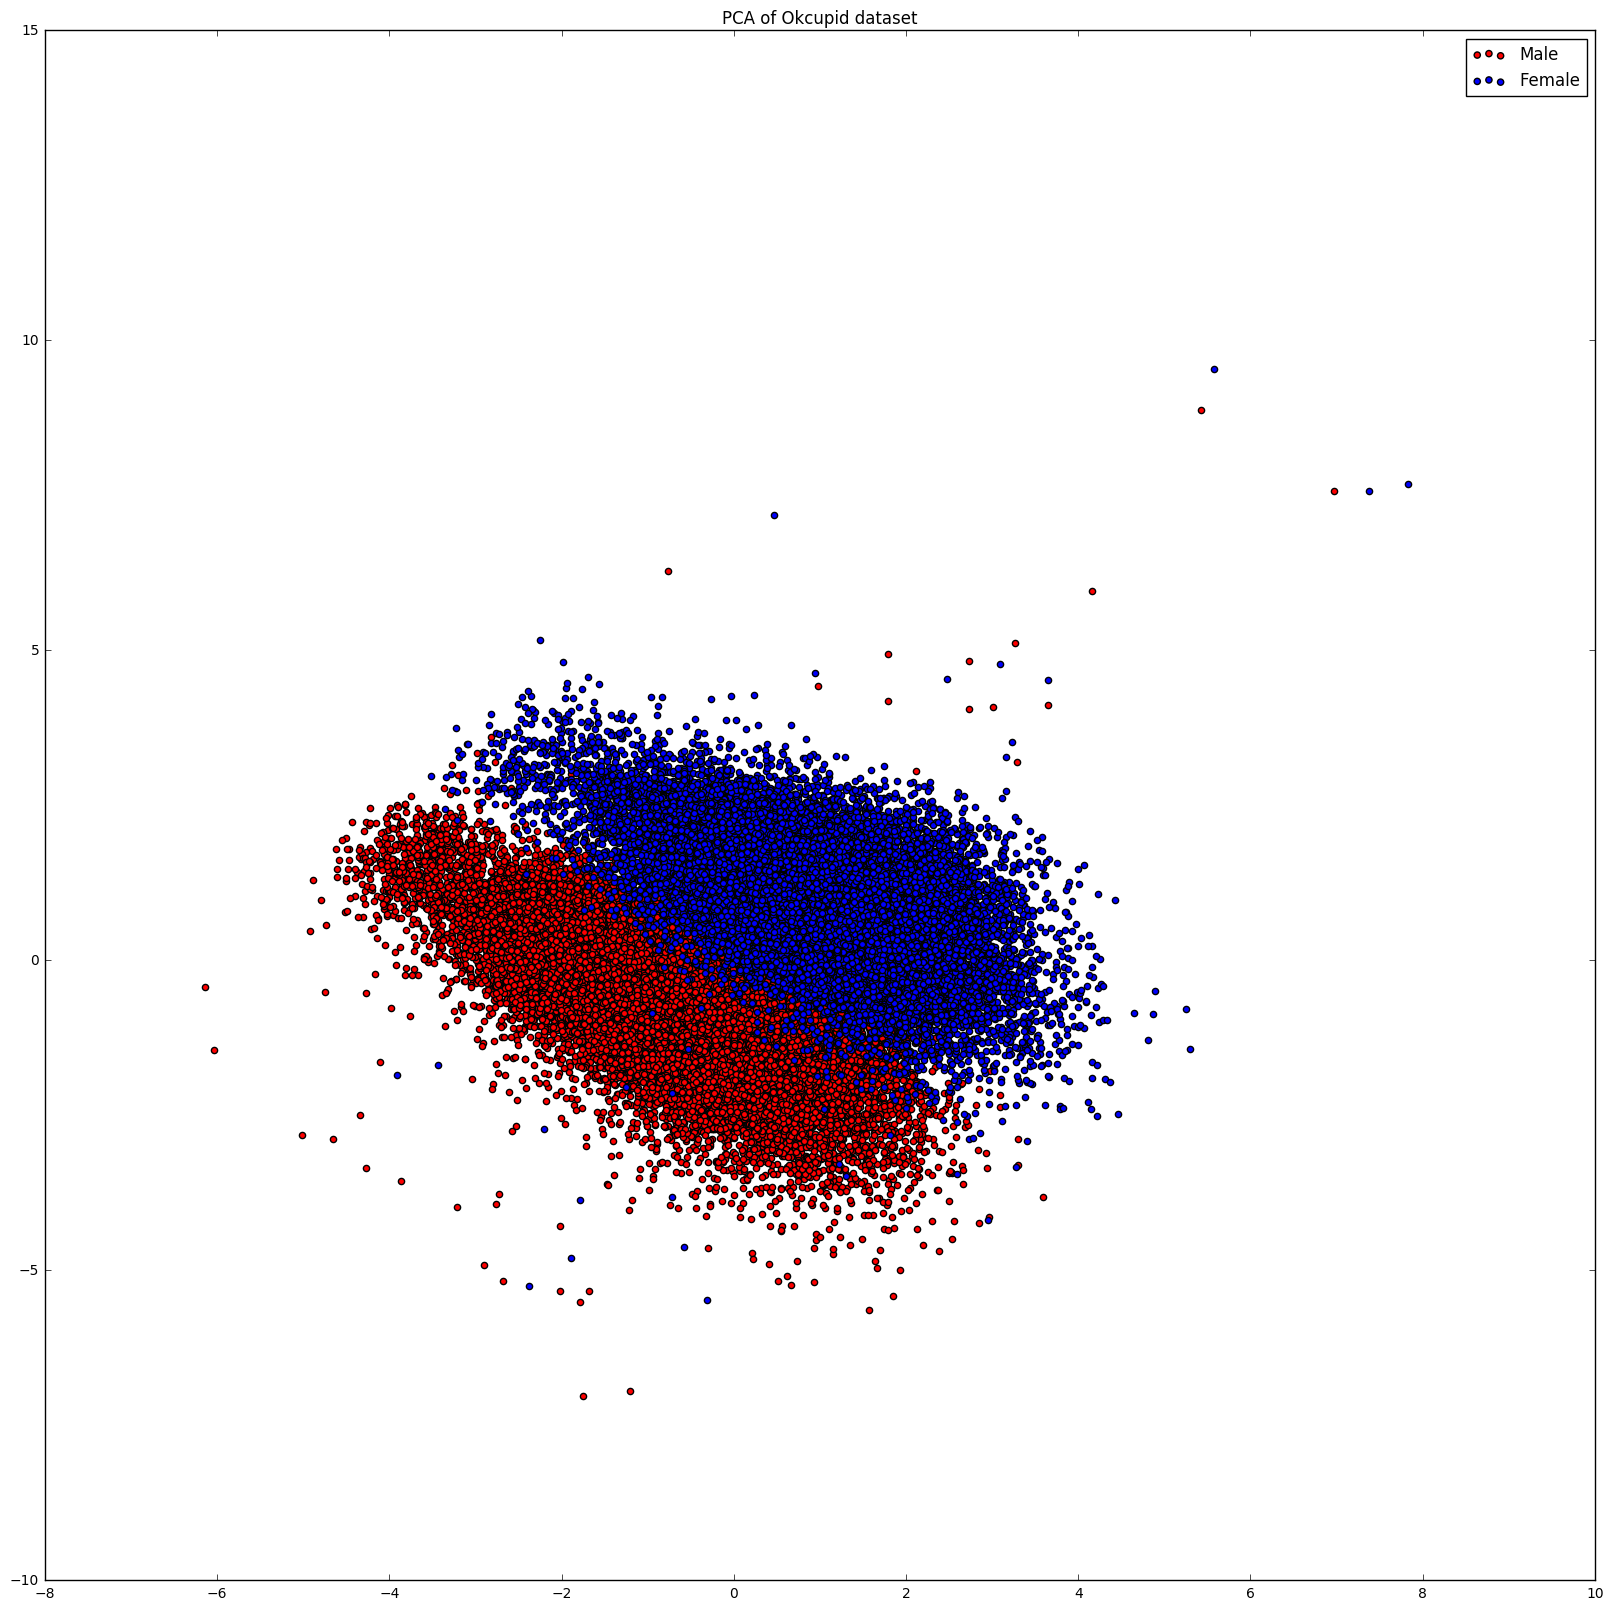

In [114]:
#sex male = 0.82, female =-1.21 (note - quick snapshot of gender ratio!)
Male = okc_data_numeric_std["sex"]>0
Female =  okc_data_numeric_std["sex"]<0

pca = PCA(n_components=10)
X_r = pca.fit(okc_data_numeric_std).transform(okc_data_numeric_std)


# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure(figsize=(20,20))

plt.scatter(X_r[ np.ix_(Male, [0]) ]    , X_r[ np.ix_(Male, [1]) ]   , c='r', label="Male")
plt.scatter(X_r[ np.ix_(Female, [0]) ]  , X_r[ np.ix_(Female, [1]) ] , c='b', label="Female")

plt.legend()
plt.title('PCA of Okcupid dataset')